In [1]:
%autosave 0

Autosave disabled


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from pydataset import data

Let's work with the geyser dataset from seaborn!

In [4]:
df = sns.load_dataset('geyser')
df.head()

,duration,waiting,kind
0,3.600,79,long
1,1.800,54,short
2,3.333,74,long
3,2.283,62,short
4,4.533,85,long


We can make scatter plots using seaborn.

The function is sns.relplot().

We will pass in our data, along with the columns to be used for the x and y axes.

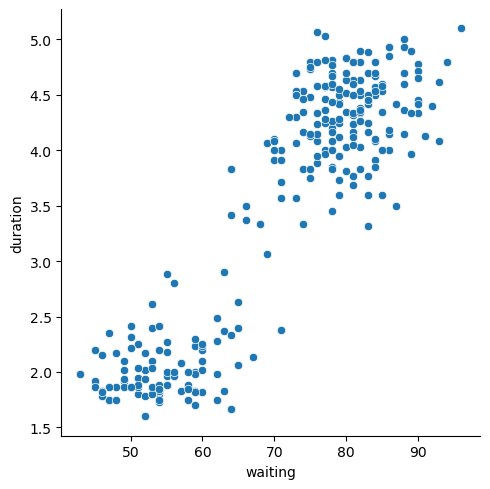

In [5]:
sns.relplot(data= df, x='waiting', y='duration')

We can add features to the plot using the matplotlib library in a familiar way!

Text(0.5, 1.0, 'Duration of Geyser')

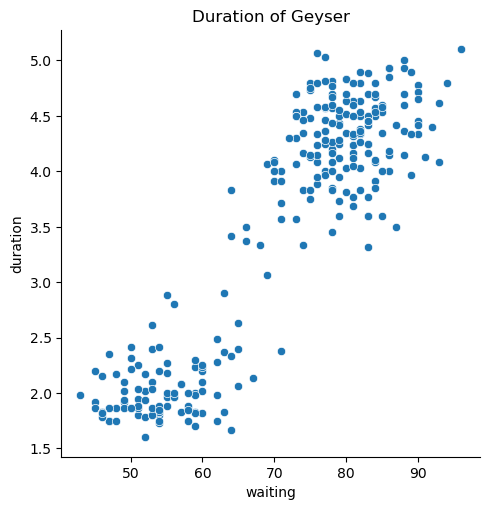

In [6]:
sns.relplot(data= df, x='waiting', y='duration')
plt.title('Duration of Geyser')

We can use the hue and col arguments to add a dimension to our chart!

Typically, we will pass a column containing categorical information to these arguments.

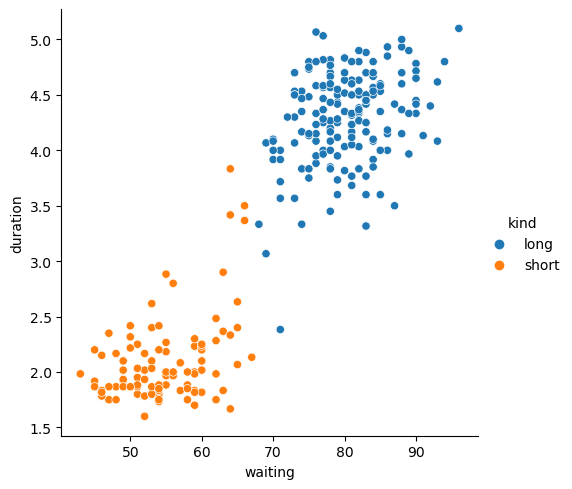

In [7]:
sns.relplot(data= df, x='waiting', y='duration', hue='kind')

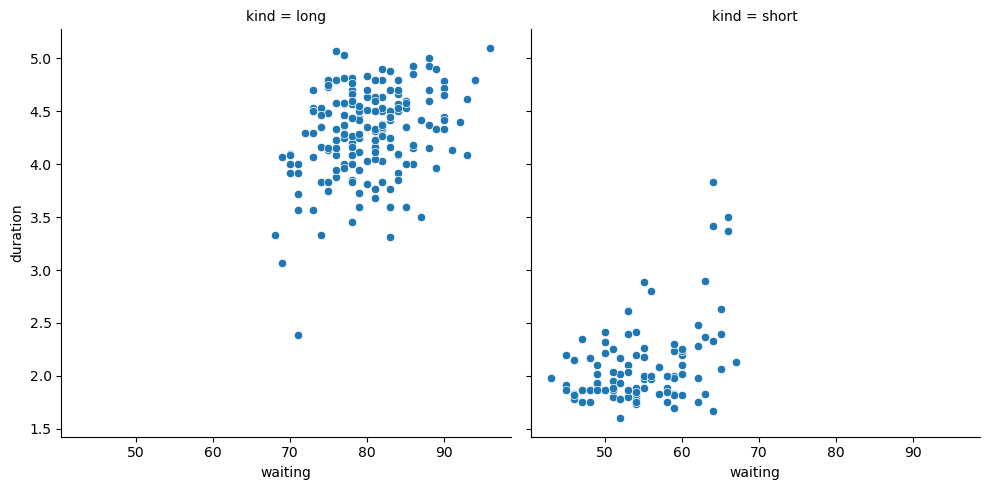

In [8]:
sns.relplot(data= df, x='waiting', y='duration', col='kind')

Let's make a histogram!

The function is sns.histplot().

Histograms are useful to visualize the distribution of values for a particular feature.

We can use kde = True, but I do not enjoy the look of it.

<Axes: xlabel='duration', ylabel='Count'>

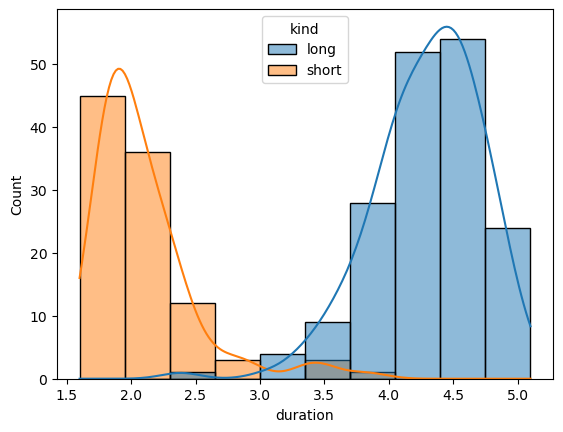

In [12]:
sns.histplot(data=df, x='duration', hue='kind', kde=True)

Boxplots are wonderful charts for one categorical and one continuous feature!

<Axes: xlabel='waiting', ylabel='kind'>

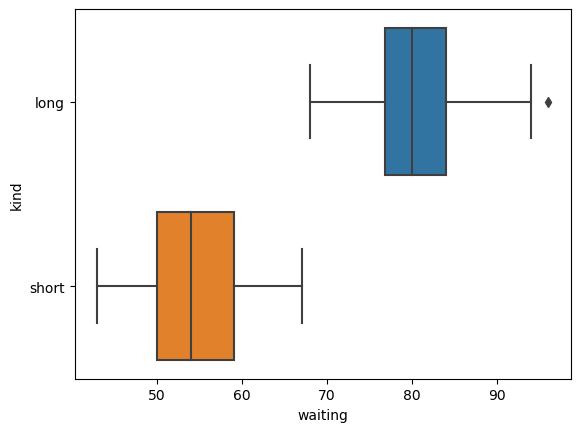

In [18]:
sns.boxplot(data=df, x='waiting', y='kind')

<Axes: xlabel='kind', ylabel='waiting'>

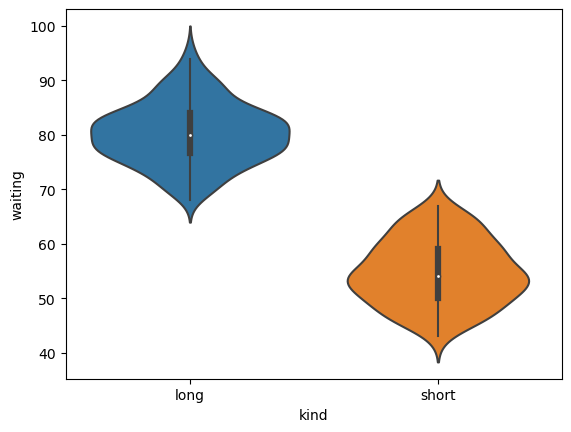

In [15]:
sns.violinplot(data=df, x='kind', y='waiting')

Bar plots work with the same kinds of information. What's the difference?

<Axes: xlabel='waiting', ylabel='kind'>

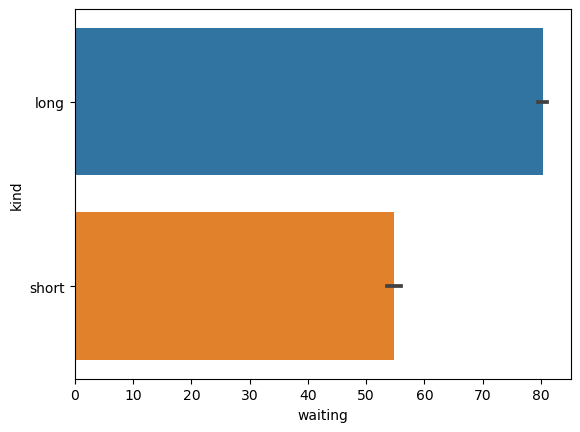

In [19]:
sns.barplot(data=df, x='waiting', y='kind')

When it comes to heatmaps and pairplots, I am not a fan..

Let's read in the mpg dataset to see why!

In [20]:
mpg = data('mpg')
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


In [21]:
mpg['is_auto'] = mpg.trans.str.startswith('a')
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,is_auto
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,True
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,False
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,False
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,True
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,True


<Axes: xlabel='is_auto', ylabel='drv'>

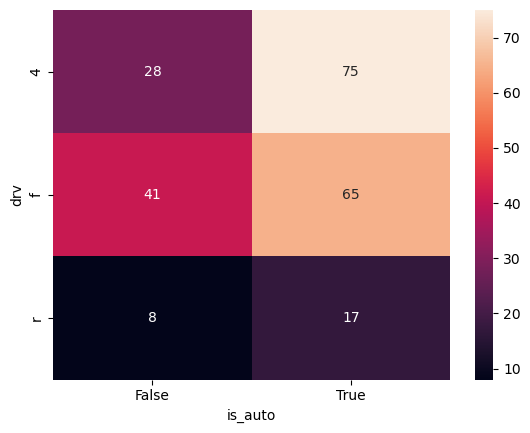

In [22]:
ct = pd.crosstab(mpg.drv, mpg.is_auto)
sns.heatmap(ct, annot = True)

In [23]:
mpg['drv_count'] = mpg.groupby(['drv', 'is_auto']).drv.transform('count')
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,is_auto,drv_count
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,True,65
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,False,41
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,False,41
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,True,65
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,True,65


<Axes: xlabel='drv', ylabel='drv_count'>

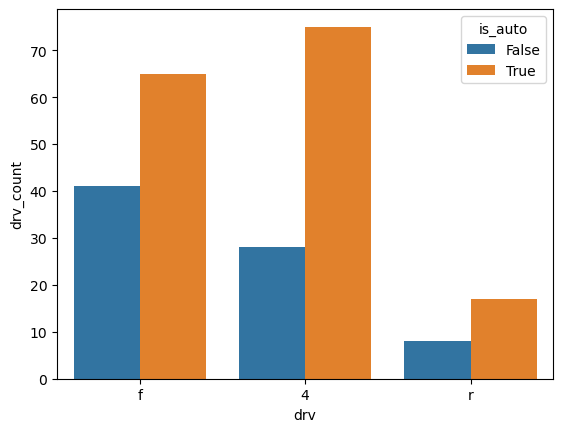

In [24]:
sns.barplot(data = mpg, x = 'drv', y = 'drv_count', hue = 'is_auto')

Let's compare the two side-by-side.

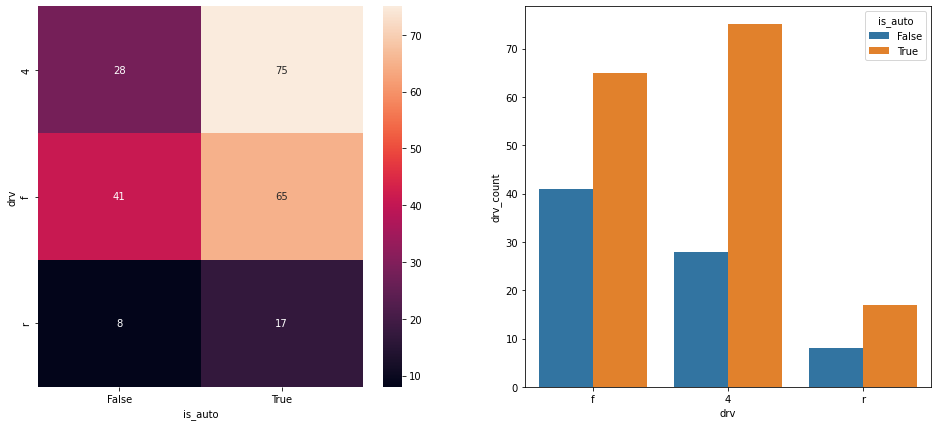

In [48]:
plt.figure(figsize = (16, 7))

plt.subplot(1, 2, 1)
sns.heatmap(ct, annot = True)

plt.subplot(1, 2, 2)
sns.barplot(data = mpg, x = 'drv', y = 'drv_count', hue = 'is_auto')

plt.show()

Now for the pairplot.

<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


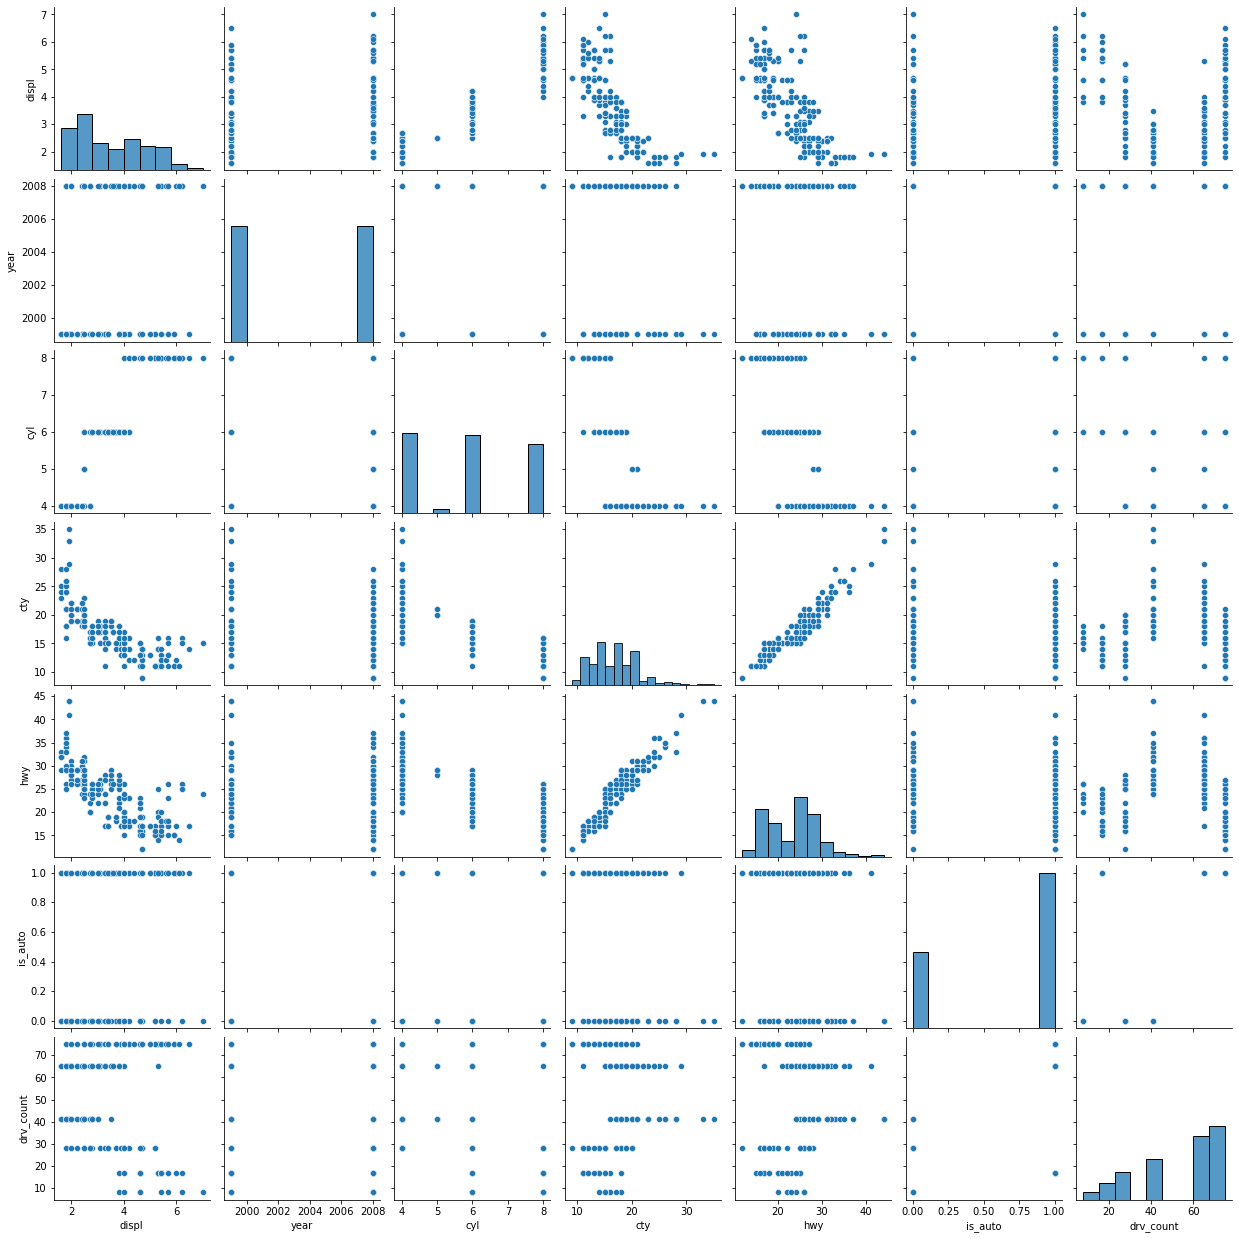

In [49]:
sns.pairplot(data = mpg)